# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss = 0
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)
# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

b2 max relative error: 4.447625e-11
W2 max relative error: 3.440708e-09
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


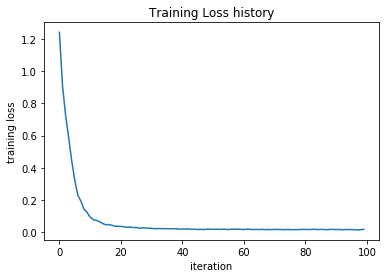

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

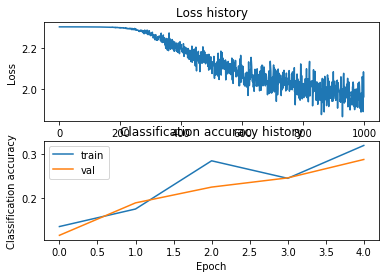

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

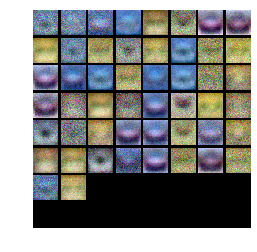

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [25]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
import seaborn as sn
import pandas as pd

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

learning_rates = [1e-5, 1e-4, 1e-3]
learning_rate_decays = [0.99, 0.95, 0.8]



# hypothesis: learning rate & decay are independent of regularization
# can visualize these separately
#regs = [0.03, 0.1, 0.25]

# Train the network

lrlist = []
lrdlist = []
val_acclist = []

i=0
for lr in learning_rates:
    for lrd in learning_rate_decays:            
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=500, batch_size=200,
                    learning_rate=lr, learning_rate_decay=lrd,
                    reg=0.25, verbose=True)

#        plt.subplot(len(learning_rates), len(learning_rate_decays), i+1)
#        plt.plot(stats['loss_history'])
#        plt.title('%s %.2f' % (lr, lrd))

#        i+=1

        # Predict on the validation set
        val_acclist.append((net.predict(X_val) == y_val).mean())
        lrdlist.append(lrd)
        lrlist.append(lr)
        
df = pd.DataFrame(list(zip(lrlist, lrdlist, val_acclist)), 
                  columns=['learning_rate','learning_decay','val_acc'])

iteration 0 / 500: loss 2.302966
iteration 100 / 500: loss 2.302935
iteration 200 / 500: loss 2.302909
iteration 300 / 500: loss 2.302908
iteration 400 / 500: loss 2.302874
iteration 0 / 500: loss 2.302828
iteration 100 / 500: loss 2.302758
iteration 200 / 500: loss 2.302754
iteration 300 / 500: loss 2.302638
iteration 400 / 500: loss 2.302562
iteration 0 / 500: loss 2.302413
iteration 100 / 500: loss 2.302488
iteration 200 / 500: loss 2.302337
iteration 300 / 500: loss 2.302234
iteration 400 / 500: loss 2.302069
iteration 0 / 500: loss 2.301964
iteration 100 / 500: loss 2.290499
iteration 200 / 500: loss 2.210834
iteration 300 / 500: loss 2.198765
iteration 400 / 500: loss 2.147806
iteration 0 / 500: loss 2.014521
iteration 100 / 500: loss 2.022045
iteration 200 / 500: loss 1.947425
iteration 300 / 500: loss 1.901430
iteration 400 / 500: loss 1.949178
iteration 0 / 500: loss 1.944140
iteration 100 / 500: loss 1.878134
iteration 200 / 500: loss 1.835342
iteration 300 / 500: loss 1.8160

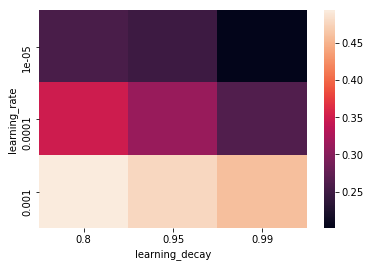

In [26]:
sn.heatmap(df.pivot('learning_rate','learning_decay','val_acc'))
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [28]:
print("Best validation accuracy is %f" % max(val_acclist))

Best validation accuracy is 0.494000


In [31]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
import seaborn as sn
import pandas as pd

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

learning_rates = [1e-4, 1e-3, 1e-2]
learning_rate_decays = [0.95, 0.8, 0.7]



# hypothesis: learning rate & decay are independent of regularization
# can visualize these separately
#regs = [0.03, 0.1, 0.25]

# Train the network

lrlist = []
lrdlist = []
val_acclist = []

i=0
for lr in learning_rates:
    for lrd in learning_rate_decays:            
        stats = net.train(X_train, y_train, X_val, y_val,
                    num_iters=500, batch_size=200,
                    learning_rate=lr, learning_rate_decay=lrd,
                    reg=0.25, verbose=True)

#        plt.subplot(len(learning_rates), len(learning_rate_decays), i+1)
#        plt.plot(stats['loss_history'])
#        plt.title('%s %.2f' % (lr, lrd))

#        i+=1

        # Predict on the validation set
        val_acclist.append((net.predict(X_val) == y_val).mean())
        lrdlist.append(lrd)
        lrlist.append(lr)
        
df = pd.DataFrame(list(zip(lrlist, lrdlist, val_acclist)), 
                  columns=['learning_rate','learning_decay','val_acc'])

iteration 0 / 500: loss 2.302987
iteration 100 / 500: loss 2.302616
iteration 200 / 500: loss 2.300295
iteration 300 / 500: loss 2.272972
iteration 400 / 500: loss 2.209226
iteration 0 / 500: loss 2.129530
iteration 100 / 500: loss 2.065456
iteration 200 / 500: loss 2.108069
iteration 300 / 500: loss 1.990717
iteration 400 / 500: loss 1.997360
iteration 0 / 500: loss 2.010708
iteration 100 / 500: loss 1.996470
iteration 200 / 500: loss 1.997257
iteration 300 / 500: loss 1.882599
iteration 400 / 500: loss 1.933940
iteration 0 / 500: loss 1.837860
iteration 100 / 500: loss 1.756024
iteration 200 / 500: loss 1.790676
iteration 300 / 500: loss 1.622853
iteration 400 / 500: loss 1.636504
iteration 0 / 500: loss 1.545611
iteration 100 / 500: loss 1.605500
iteration 200 / 500: loss 1.686107
iteration 300 / 500: loss 1.429727
iteration 400 / 500: loss 1.440371
iteration 0 / 500: loss 1.449089
iteration 100 / 500: loss 1.558339
iteration 200 / 500: loss 1.503753
iteration 300 / 500: loss 1.5032

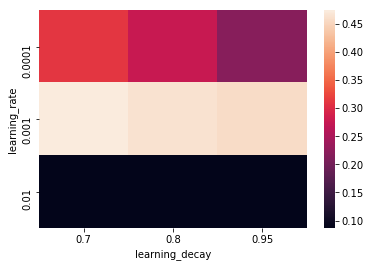

In [32]:
sn.heatmap(df.pivot('learning_rate','learning_decay','val_acc'))
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [75]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
import seaborn as sn
import pandas as pd

input_size = 32 * 32 * 3
num_classes = 10


learning_rates = [1e-3, 3e-3]
learning_rate_decays = [0.7, 0.5, 0.3]
hidden_sizes = [50, 150, 500]
batch_sizes = [50, 200, 500]
regs = [0.1, 0.3]



# hypothesis: learning rate & decay are independent of regularization
# can visualize these separately

# Train the network

lrlist = []
lrdlist = []
hslist = []
bslist = []
reglist = []
val_acclist = []
statslist = []

i=0
for lr in learning_rates:
    for lrd in learning_rate_decays:
        for hs in hidden_sizes:
            for bs in batch_sizes:
                for reg in regs:
                    net = TwoLayerNet(input_size, hs, num_classes)

                    stats = net.train(X_train, y_train, X_val, y_val,
                                num_iters=1000, batch_size=200,
                                learning_rate=lr, learning_rate_decay=lrd,
                                reg=reg, verbose=True)

                    val_acclist.append((net.predict(X_val) == y_val).mean())
                    lrdlist.append(lrd)
                    lrlist.append(lr)
                    hslist.append(hs)
                    bslist.append(bs)
                    reglist.append(reg)
                    statslist.append(stats)
        

iteration 0 / 1000: loss 2.302754
iteration 100 / 1000: loss 1.974782
iteration 200 / 1000: loss 1.793958
iteration 300 / 1000: loss 1.746369
iteration 400 / 1000: loss 1.706532
iteration 500 / 1000: loss 1.713880
iteration 600 / 1000: loss 1.664617
iteration 700 / 1000: loss 1.593560
iteration 800 / 1000: loss 1.607022
iteration 900 / 1000: loss 1.663350
iteration 0 / 1000: loss 2.303037
iteration 100 / 1000: loss 2.064027
iteration 200 / 1000: loss 1.783534
iteration 300 / 1000: loss 1.741703
iteration 400 / 1000: loss 1.721566
iteration 500 / 1000: loss 1.690836
iteration 600 / 1000: loss 1.627237
iteration 700 / 1000: loss 1.633267
iteration 800 / 1000: loss 1.676025
iteration 900 / 1000: loss 1.623239
iteration 0 / 1000: loss 2.302736
iteration 100 / 1000: loss 2.004833
iteration 200 / 1000: loss 1.877454
iteration 300 / 1000: loss 1.761192
iteration 400 / 1000: loss 1.730507
iteration 500 / 1000: loss 1.661611
iteration 600 / 1000: loss 1.669301
iteration 700 / 1000: loss 1.58889

iteration 900 / 1000: loss 1.698701
iteration 0 / 1000: loss 2.303056
iteration 100 / 1000: loss 2.107071
iteration 200 / 1000: loss 1.858952
iteration 300 / 1000: loss 1.859426
iteration 400 / 1000: loss 1.936373
iteration 500 / 1000: loss 1.747281
iteration 600 / 1000: loss 1.792320
iteration 700 / 1000: loss 1.772256
iteration 800 / 1000: loss 1.703098
iteration 900 / 1000: loss 1.683315
iteration 0 / 1000: loss 2.303044
iteration 100 / 1000: loss 2.050810
iteration 200 / 1000: loss 1.894063
iteration 300 / 1000: loss 1.693134
iteration 400 / 1000: loss 1.668528
iteration 500 / 1000: loss 1.777485
iteration 600 / 1000: loss 1.569422
iteration 700 / 1000: loss 1.769318
iteration 800 / 1000: loss 1.720029
iteration 900 / 1000: loss 1.667016
iteration 0 / 1000: loss 2.303936
iteration 100 / 1000: loss 2.085229
iteration 200 / 1000: loss 1.951168
iteration 300 / 1000: loss 1.858717
iteration 400 / 1000: loss 1.915327
iteration 500 / 1000: loss 1.773431
iteration 600 / 1000: loss 1.81615

iteration 800 / 1000: loss 1.851325
iteration 900 / 1000: loss 1.969856
iteration 0 / 1000: loss 2.302987
iteration 100 / 1000: loss 2.187046
iteration 200 / 1000: loss 2.076801
iteration 300 / 1000: loss 1.882303
iteration 400 / 1000: loss 1.866903
iteration 500 / 1000: loss 1.883640
iteration 600 / 1000: loss 1.974703
iteration 700 / 1000: loss 1.918437
iteration 800 / 1000: loss 1.906612
iteration 900 / 1000: loss 1.851165
iteration 0 / 1000: loss 2.303969
iteration 100 / 1000: loss 2.218680
iteration 200 / 1000: loss 1.996613
iteration 300 / 1000: loss 1.911817
iteration 400 / 1000: loss 1.879313
iteration 500 / 1000: loss 1.910908
iteration 600 / 1000: loss 1.860476
iteration 700 / 1000: loss 1.930470
iteration 800 / 1000: loss 1.955573
iteration 900 / 1000: loss 1.884044
iteration 0 / 1000: loss 2.304149
iteration 100 / 1000: loss 2.200935
iteration 200 / 1000: loss 2.008043
iteration 300 / 1000: loss 1.951349
iteration 400 / 1000: loss 1.917207
iteration 500 / 1000: loss 1.79239

iteration 700 / 1000: loss 1.549724
iteration 800 / 1000: loss 1.466035
iteration 900 / 1000: loss 1.430481
iteration 0 / 1000: loss 2.307097
iteration 100 / 1000: loss 1.844985
iteration 200 / 1000: loss 1.695949
iteration 300 / 1000: loss 1.590969
iteration 400 / 1000: loss 1.751489
iteration 500 / 1000: loss 1.501578
iteration 600 / 1000: loss 1.619490
iteration 700 / 1000: loss 1.384258
iteration 800 / 1000: loss 1.507821
iteration 900 / 1000: loss 1.381586
iteration 0 / 1000: loss 2.304104
iteration 100 / 1000: loss 1.779288
iteration 200 / 1000: loss 1.771580
iteration 300 / 1000: loss 1.539833
iteration 400 / 1000: loss 1.586030
iteration 500 / 1000: loss 1.496045
iteration 600 / 1000: loss 1.489352
iteration 700 / 1000: loss 1.347704
iteration 800 / 1000: loss 1.244121
iteration 900 / 1000: loss 1.283841
iteration 0 / 1000: loss 2.307314
iteration 100 / 1000: loss 1.710933
iteration 200 / 1000: loss 1.673340
iteration 300 / 1000: loss 1.562048
iteration 400 / 1000: loss 1.45903

iteration 600 / 1000: loss 1.651074
iteration 700 / 1000: loss 1.684719
iteration 800 / 1000: loss 1.617518
iteration 900 / 1000: loss 1.656053
iteration 0 / 1000: loss 2.302714
iteration 100 / 1000: loss 1.959619
iteration 200 / 1000: loss 1.752747
iteration 300 / 1000: loss 1.740243
iteration 400 / 1000: loss 1.688967
iteration 500 / 1000: loss 1.789197
iteration 600 / 1000: loss 1.640412
iteration 700 / 1000: loss 1.637686
iteration 800 / 1000: loss 1.701560
iteration 900 / 1000: loss 1.697900
iteration 0 / 1000: loss 2.303044
iteration 100 / 1000: loss 2.003216
iteration 200 / 1000: loss 1.903735
iteration 300 / 1000: loss 1.818343
iteration 400 / 1000: loss 1.630464
iteration 500 / 1000: loss 1.636833
iteration 600 / 1000: loss 1.740457
iteration 700 / 1000: loss 1.652292
iteration 800 / 1000: loss 1.644663
iteration 900 / 1000: loss 1.599856
iteration 0 / 1000: loss 2.302753
iteration 100 / 1000: loss 2.015023
iteration 200 / 1000: loss 1.732522
iteration 300 / 1000: loss 1.78555

In [76]:
df = pd.DataFrame(list(zip(lrlist, lrdlist, hslist, bslist, reglist, val_acclist, statslist)), 
                  columns=['learning_rate','learning_decay','hidden_size',
                           'batch_size','regularization','val_acc','stats'])
df.to_pickle('twolayer_HPsearch_valaccuracy.pkl')

In [79]:
df.sort_values(axis=0, by='val_acc')

,learning_rate,learning_decay,hidden_size,batch_size,regularization,val_acc,stats
38,0.001,0.3,50,200,0.1,0.295,"{'loss_history': [2.302724764298659, 2.3026895..."
39,0.001,0.3,50,200,0.3,0.301,"{'loss_history': [2.3030521808775304, 2.303019..."
41,0.001,0.3,50,500,0.3,0.303,"{'loss_history': [2.303040437495618, 2.3030067..."
37,0.001,0.3,50,50,0.3,0.304,"{'loss_history': [2.303039048324644, 2.3029942..."
36,0.001,0.3,50,50,0.1,0.306,"{'loss_history': [2.302733573615097, 2.3027042..."
...,...,...,...,...,...,...,...
60,0.003,0.7,150,50,0.1,0.511,"{'loss_history': [2.3030341672171293, 2.302822..."
62,0.003,0.7,150,200,0.1,0.516,"{'loss_history': [2.303055295437596, 2.3028725..."
70,0.003,0.7,500,500,0.1,0.516,"{'loss_history': [2.304103577123787, 2.3034198..."
66,0.003,0.7,500,50,0.1,0.521,"{'loss_history': [2.3041568720397794, 2.303440..."


In [80]:
best_net = TwoLayerNet(input_size, 500, num_classes)
best_net.train(X_train, y_train, X_val, y_val,
                    num_iters=2000, batch_size=200,
                    learning_rate=3e-3, learning_rate_decay=.7,
                    reg=.1, verbose=True) # store the best model into this 

iteration 0 / 2000: loss 2.304124
iteration 100 / 2000: loss 1.776725
iteration 200 / 2000: loss 1.655654
iteration 300 / 2000: loss 1.458201
iteration 400 / 2000: loss 1.570866
iteration 500 / 2000: loss 1.568967
iteration 600 / 2000: loss 1.445006
iteration 700 / 2000: loss 1.410503
iteration 800 / 2000: loss 1.332622
iteration 900 / 2000: loss 1.242627
iteration 1000 / 2000: loss 1.275274
iteration 1100 / 2000: loss 1.230292
iteration 1200 / 2000: loss 1.341491
iteration 1300 / 2000: loss 1.364776
iteration 1400 / 2000: loss 1.395007
iteration 1500 / 2000: loss 1.266208
iteration 1600 / 2000: loss 1.214962
iteration 1700 / 2000: loss 1.242569
iteration 1800 / 2000: loss 1.177582
iteration 1900 / 2000: loss 1.257860


{'loss_history': [2.3041235347655564,
  2.303678574809191,
  2.3031191018386865,
  2.3019543728602962,
  2.301746935751803,
  2.2989250711601734,
  2.2951725782614774,
  2.292129011829606,
  2.2859972275905402,
  2.2801424750351753,
  2.269495819044363,
  2.2568199506596014,
  2.213998482135018,
  2.1972789712895144,
  2.189316979821976,
  2.209727035936493,
  2.1479571751035844,
  2.123965339218628,
  2.129737061281922,
  2.1573811122024766,
  2.1136179910774837,
  2.0744797410681737,
  2.042782172743393,
  2.072748476224124,
  2.025417419776345,
  2.0026604814288,
  1.9983470143790065,
  2.1148177306645297,
  1.933078644051931,
  2.0538257366422497,
  1.9927798520363045,
  2.0519219983275843,
  1.9401515794373714,
  2.002682938827548,
  1.9851006004468905,
  1.9204809778104495,
  1.9750240518502986,
  1.9086365107819099,
  1.920209869385022,
  1.8297927922152257,
  1.9538561559751266,
  1.8854566873147274,
  1.9286953399927056,
  1.9627166842431154,
  1.893750896760371,
  1.845835166

In [81]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.537


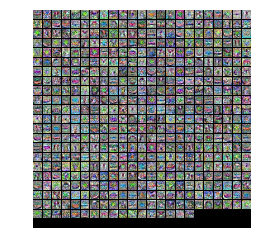

In [82]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [83]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.539


I could further refine the parameters. Intuitively, I should refine until there is no single parameter value that always appears in the top validation accuracies. That would mean that for every parameter I have found the "range" in which it is optimal. However, my big grid search already went through 100+ parameter combinations. At some point, I will be overfitting to the validation set, and lose generalizability to the test set. I don't yet know what that point is. What I do know is that my maximum validation scores in the giant search are only somewhat better than my preliminary searches of ~10 parameters (10 value/2 param search: ~47% -> 100 value/6 param search: ~52%). And, of course, **I am lazy**

**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$
1. Training on a larger dataset should help reduce biases specific to the training samples chosen, and therefore increase the generalizability of the model and improve accuracy on the test set.
2. This is probably a bad idea because more hidden units increase the chance of overfitting the model to the training data. If the training dataset performance is good, you probably don't need more hidden units. 
3. This could help because it would effectively reduce the number of parameters of the model, reducing overfitting to the training data. 


$\color{blue}{\textit Your Explanation:}$

